In [162]:
%matplotlib inline

# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import hvplot.pandas
from pathlib import Path
import plotly.express as px



In [163]:
# Load the crypto_data.csv modified dataset includng current 2021 data

file_path = "./resources/sf_airbnb_listings_modified.csv"
ab_df = pd.read_csv(file_path,index_col=0)
ab_df.head()

C:\anaconda\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (30,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,...,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
958,https://www.airbnb.com/rooms/958,2.020000e+13,6/2/2019,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,*Quiet cul de sac in friendly neighborhood *St...,https://a0.muscache.com/im/pictures/b7c2a199-4...,1169,https://www.airbnb.com/users/show/1169,Holly,7/31/2008,"San Francisco, California, United States",We are a family with 2 boys born in 2009 and 2...,within a few hours,100%,NaN,t,https://a0.muscache.com/im/pictures/efdad96a-3...,https://a0.muscache.com/im/pictures/efdad96a-3...,Duboce Triangle,1,1,"[''''email'''', ''''phone'''', ''''facebook'''...",t,t,Lower Haight,Western Addition,...,1.0,30.0,2 months ago,t,1,3,7,92,6/2/2019,192,56,7/23/2009,5/16/2019,97.0,10.0,10.0,10.0,10.0,10.0,9.0,STR-0001256,t,1,1,0,0,1.60
7918,https://www.airbnb.com/rooms/7918,2.020000e+13,6/2/2019,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",https://a0.muscache.com/im/pictures/26356/8030...,21994,https://www.airbnb.com/users/show/21994,Aaron,6/17/2009,"San Francisco, California, United States",7 minutes walk to UCSF. 15 minutes walk to US...,within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/21994/profile...,https://a0.muscache.com/im/users/21994/profile...,Cole Valley,10,10,"[''''email'''', ''''phone'''', ''''reviews''''...",t,t,Cole Valley,Haight Ashbury,...,32.0,60.0,19 months ago,t,30,60,90,365,6/2/2019,17,0,8/31/2009,11/21/2016,85.0,8.0,8.0,9.0,9.0,9.0,8.0,NaN,f,9,0,9,0,0.14
8142,https://www.airbnb.com/rooms/8142,2.020000e+13,6/2/2019,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,NaN,https://a0.muscache.com/im/pictures/27832/3b1f...,21994,https://www.airbnb.com/users/show/21994,Aaron,6/17/2009,"San Francisco, California, United States",7 minutes walk to UCSF. 15 minutes walk to US...,within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/21994/profile...,https://a0.muscache.com/im/users/21994/profile...,Cole Valley,10,10,"[''''email'''', ''''phone'''', ''''reviews''''...",t,t,Cole Valley,Haight Ashbury,...,32.0,90.0,19 months ago,t,11,41,71,346,6/2/2019,8,1,9/8/2014,9/12/2018,93.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,f,9,0,9,0,0.14
8339,https://www.airbnb.com/rooms/8339,2.020000e+13,6/2/2019,Historic Alamo Square Victorian,Pls email before booking. Interior featured i...,NaN,https://a0.muscache.com/im/pictures/213fbf05-3...,24215,https://www.airbnb.com/users/show/24215,Rosy,7/2/2009,"San Francisco, California, United States",I''''m in Interior Stylist living in SF. \r\n\...,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/user/a7919...,https://a0.muscache.com/im/pictures/user/a7919...,Alamo Square,2,2,"[''''email'''', ''''phone'''', ''''reviews''''...",t,t,Alamo Square,Western Addition,...,4.0,1125.0,2 weeks ago,t,30,60,90,90,6/2/2019,27,1,9/25/2009,8/11/

In [164]:
# Dropping columns will not to be use that consists of non value added colums, null columns and NaN value columns

In [165]:
# url, hostname and some other columns are not useful in predicting price and can be dropped
initial_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped']
df = ab_df.drop(initial_drop, axis=1)

In [166]:
df.head()

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
958,7/31/2008,within a few hours,100%,NaN,t,1,1,t,t,Lower Haight,Western Addition,37.76931,-122.43386,t,Apartment,Entire home/apt,3,1,1.0,2.0,Real Bed,"{TV,Cable TV,Internet,Wifi,Kitchen,Pets live o...",$170.00,1,30,1.0,1.0,30.0,30.0,1.0,30.0,2 months ago,t,1,3,7,92,192,56,7/23/2009,5/16/2019,97.0,10.0,10.0,10.0,10.0,10.0,9.0,STR-0001256,t,1,1,0,0,1.60
7918,6/17/2009,within a few hours,100%,NaN,f,10,10,t,t,Cole Valley,Haight Ashbury,37.76669,-122.45250,t,Apartment,Private room,2,4,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,Free street parking,...",$65.00,32,60,32.0,32.0,60.0,60.0,32.0,60.0,19 months ago,t,30,60,90,365,17,0,8/31/2009,11/21/2016,85.0,8.0,8.0,9.0,9.0,9.0,8.0,NaN,f,9,0,9,0,0.14
8142,6/17/2009,within a few hours,100%,NaN,f,10,10,t,t,Cole Valley,Haight Ashbury,37.76487,-122.45183,t,Apartment,Private room,2,4,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,Free street parking,...",$65.00,32,90,32.0,32.0,90.0,90.0,32.0,90.0,19 months ago,t,11,41,71,346,8,1,9/8/2014,9/12/2018,93.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,f,9,0,9,0,0.14
8339,7/2/2009,within an hour,100%,NaN,f,2,2,t,t,Alamo Square,Western Addition,37.77525,-122.43637,t,House,Entire home/apt,5,1.5,2.0,2.0,Real Bed,"{TV,Internet,Wifi,Kitchen,Heating,Family/kid f...",$685.00,4,1125,4.0,4.0,1125.0,1125.0,4.0,1125.0,2 weeks ago,t,30,60,90,90,27,1,9/25/2009,8/11/2018,97.0,10.0,10.0,10.0,10.0,10.0,9.0,STR-0000264,f,2,2,0,0,0.23
8739,1/27/2009,within an hour,100%,NaN,t,2,2,t,f,Mission District,Mission,37.75919,-122.42237,t,Condominium,Private room,3,1,1.0,2.0,Real Bed,"{TV,Cable TV,Internet,Wifi,Pets live on this p...",$139.00,1,14,1.0,1.0,14.0,14.0,1.0,14.0,2 weeks ago,t,11,38,64,153,672,93,8/1/2009,5/21/2019,98.0,10.0,10.0,10.0,10.0,10.0,10.0,STR-0000028,t,2,0,2,0,5.61


In [167]:
# df column summary

In [168]:
df.isna().sum()

host_since                                        0
host_response_time                             1986
                                               ... 
calculated_host_listings_count_shared_rooms       0
reviews_per_month                              2401
Length: 55, dtype: int64

In [169]:
print(f"The dataset contains {len(df)} SF Airbnb listings")
pd.set_option('display.max_columns', len(df.columns))
pd.set_option('display.max_rows', 5)
df.head()

The dataset contains 12616 SF Airbnb listings


,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
958,7/31/2008,within a few hours,100%,NaN,t,1,1,t,t,Lower Haight,Western Addition,37.76931,-122.43386,t,Apartment,Entire home/apt,3,1,1.0,2.0,Real Bed,"{TV,Cable TV,Internet,Wifi,Kitchen,Pets live o...",$170.00,1,30,1.0,1.0,30.0,30.0,1.0,30.0,2 months ago,t,1,3,7,92,192,56,7/23/2009,5/16/2019,97.0,10.0,10.0,10.0,10.0,10.0,9.0,STR-0001256,t,1,1,0,0,1.60
7918,6/17/2009,within a few hours,100%,NaN,f,10,10,t,t,Cole Valley,Haight Ashbury,37.76669,-122.45250,t,Apartment,Private room,2,4,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,Free street parking,...",$65.00,32,60,32.0,32.0,60.0,60.0,32.0,60.0,19 months ago,t,30,60,90,365,17,0,8/31/2009,11/21/2016,85.0,8.0,8.0,9.0,9.0,9.0,8.0,NaN,f,9,0,9,0,0.14
8142,6/17/2009,within a few hours,100%,NaN,f,10,10,t,t,Cole Valley,Haight Ashbury,37.76487,-122.45183,t,Apartment,Private room,2,4,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,Free street parking,...",$65.00,32,90,32.0,32.0,90.0,90.0,32.0,90.0,19 months ago,t,11,41,71,346,8,1,9/8/2014,9/12/2018,93.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,f,9,0,9,0,0.14
8339,7/2/2009,within an hour,100%,NaN,f,2,2,t,t,Alamo Square,Western Addition,37.77525,-122.43637,t,House,Entire home/apt,5,1.5,2.0,2.0,Real Bed,"{TV,Internet,Wifi,Kitchen,Heating,Family/kid f...",$685.00,4,1125,4.0,4.0,1125.0,1125.0,4.0,1125.0,2 weeks ago,t,30,60,90,90,27,1,9/25/2009,8/11/2018,97.0,10.0,10.0,10.0,10.0,10.0,9.0,STR-0000264,f,2,2,0,0,0.23
8739,1/27/2009,within an hour,100%,NaN,t,2,2,t,f,Mission District,Mission,37.75919,-122.42237,t,Condominium,Private room,3,1,1.0,2.0,Real Bed,"{TV,Cable TV,Internet,Wifi,Pets live on this p...",$139.00,1,14,1.0,1.0,14.0,14.0,1.0,14.0,2 weeks ago,t,11,38,64,153,672,93,8/1/2009,5/21/2019,98.0,10.0,10.0,10.0,10.0,10.0,10.0,STR-0000028,t,2,0,2,0,5.61


In [170]:
lat_long = df[['latitude', 'longitude']]

In [171]:
df.drop(['latitude', 'longitude', 'neighbourhood','is_location_exact'], axis=1, inplace=True)

In [172]:
sum((df.minimum_nights == df.minimum_minimum_nights) == False)

609

In [173]:
# We can drop this features
df.drop(['host_acceptance_rate','minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

In [174]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

In [175]:
df.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
958,7/31/2008,within a few hours,100%,1,1,1,1,1,Western Addition,Apartment,Entire home/apt,3,1,1.0,2.0,Real Bed,"{TV,Cable TV,Internet,Wifi,Kitchen,Pets live o...",$170.00,1,30,2 months ago,1,1,3,7,92,192,56,7/23/2009,5/16/2019,97.0,10.0,10.0,10.0,10.0,10.0,9.0,STR-0001256,1,1,1,0,0,1.60
7918,6/17/2009,within a few hours,100%,0,10,10,1,1,Haight Ashbury,Apartment,Private room,2,4,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,Free street parking,...",$65.00,32,60,19 months ago,1,30,60,90,365,17,0,8/31/2009,11/21/2016,85.0,8.0,8.0,9.0,9.0,9.0,8.0,NaN,0,9,0,9,0,0.14
8142,6/17/2009,within a few hours,100%,0,10,10,1,1,Haight Ashbury,Apartment,Private room,2,4,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,Free street parking,...",$65.00,32,90,19 months ago,1,11,41,71,346,8,1,9/8/2014,9/12/2018,93.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,0,9,0,9,0,0.14
8339,7/2/2009,within an hour,100%,0,2,2,1,1,Western Addition,House,Entire home/apt,5,1.5,2.0,2.0,Real Bed,"{TV,Internet,Wifi,Kitchen,Heating,Family/kid f...",$685.00,4,1125,2 weeks ago,1,30,60,90,90,27,1,9/25/2009,8/11/2018,97.0,10.0,10.0,10.0,10.0,10.0,9.0,STR-0000264,0,2,2,0,0,0.23
8739,1/27/2009,within an hour,100%,1,2,2,1,0,Mission,Condominium,Private room,3,1,1.0,2.0,Real Bed,"{TV,Cable TV,Internet,Wifi,Pets live on this p...",$139.00,1,14,2 weeks ago,1,11,38,64,153,672,93,8/1/2009,5/21/2019,98.0,10.0,10.0,10.0,10.0,10.0,10.0,STR-0000028,1,2,0,2,0,5.61


# Separate numerical and boolean categoris and plot histogram to see value needed in data 

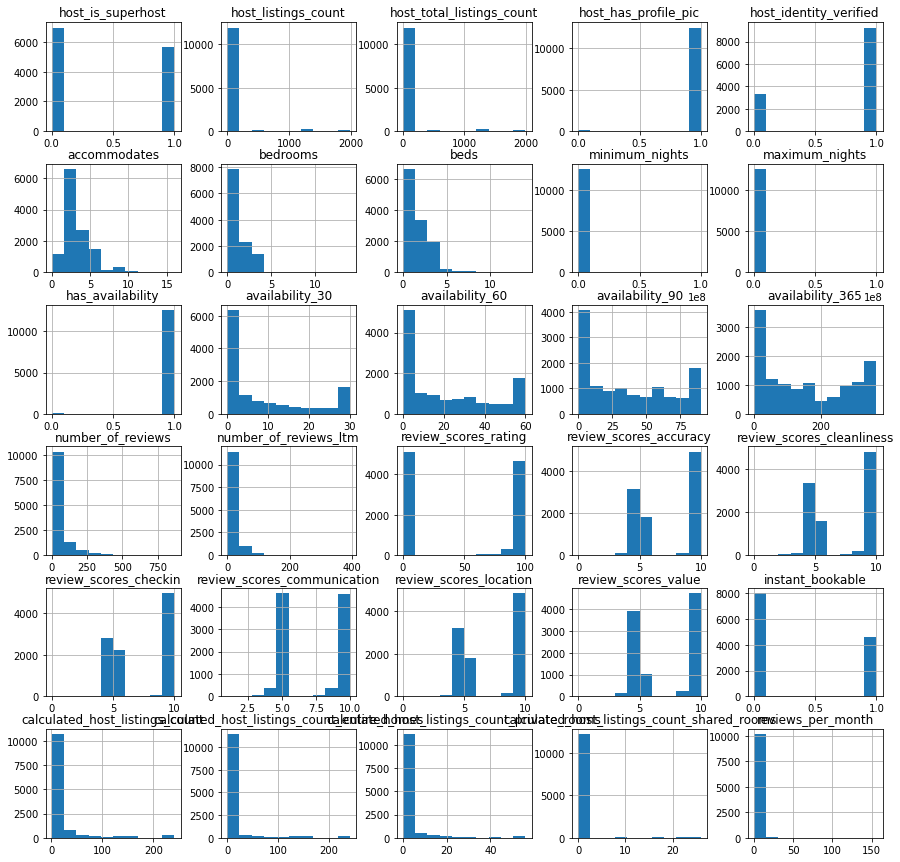

In [176]:
# lets separate numerical and boolean categoris and plot histogram to see value needed in data and can help identify important columns
df.hist(figsize=(15,15));

In [177]:
# We can clearly see that there are many columns contain one category and we can drop those columns contain only one category
df.drop(['has_availability', 'host_has_profile_pic'], axis=1, inplace=True)

In [178]:
from datetime import datetime

In [179]:
# Convert to datetime
df.host_since = pd.to_datetime(df.host_since) 

# Calculate the number of days
df['host_days_active'] = (datetime(2019, 6, 2) - df.host_since).astype('timedelta64[D]')

# Printing mean and median
print("Mean days as host:", round(df['host_days_active'].mean(),0))
print("Median days as host:", df['host_days_active'].median())

# Replacing null values with the median
df.host_days_active.fillna(df.host_days_active.median(), inplace=True)

Mean days as host: 1631.0
Median days as host: 1698.0


In [180]:
# Reading data in excel we can see tha host_response_time is unknown for so many listings
print("Null values:", df.host_response_time.isna().sum())
print(f"Proportion: {round((df.host_response_time.isna().sum()/len(df))*100, 1)}%")

Null values: 1986
Proportion: 15.7%


In [181]:
df.host_response_time.value_counts(normalize=True)

within an hour        0.637159
within a few hours    0.245626
within a day          0.094920
a few days or more    0.022295
Name: host_response_time, dtype: float64

In [182]:
# Now we can move on to other column host_response_rate showing unknown blanks same as host_response_time
# and we can print host_response_rate is unknown for so many listings
print("Null values:", df.host_response_rate.isna().sum())
print(f"Proportion: {round((df.host_response_rate.isna().sum()/len(df))*100, 1)}%")

Null values: 1986
Proportion: 15.7%


In [183]:
# Removing the % sign from the host_response_rate string and converting to an integer
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')

print("Mean host response rate:", round(df['host_response_rate'].mean(),0))
print("Median host response rate:", df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")

Mean host response rate: 95.0
Median host response rate: 100.0
Proportion of 100% host response rates: 75.7%


In [184]:
# Response rate is showing great results and we can see creating histogram for better graphical represntation, 
# the first step is to “bin” the range of values — that is, divide the entire range of values into a series of intervals
# and then count how many values fall into each interval. Alsowe have to remove or replace nulls.

df.host_response_rate = pd.cut(df.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# we have to Convert to string to replace null
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

100%       8049
unknown    1986
90-99%     1200
50-89%     1095
0-49%       286
Name: host_response_rate, dtype: int64

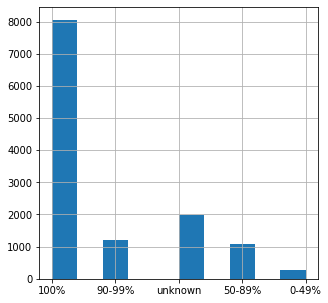

In [185]:
df.host_response_rate.hist(figsize=(5,5));

In [186]:
df.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_days_active
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
958,2008-07-31,within a few hours,100%,1,1,1,1,Western Addition,Apartment,Entire home/apt,3,1,1.0,2.0,Real Bed,"{TV,Cable TV,Internet,Wifi,Kitchen,Pets live o...",$170.00,1,30,2 months ago,1,3,7,92,192,56,7/23/2009,5/16/2019,97.0,10.0,10.0,10.0,10.0,10.0,9.0,STR-0001256,1,1,1,0,0,1.60,3958.0
7918,2009-06-17,within a few hours,100%,0,10,10,1,Haight Ashbury,Apartment,Private room,2,4,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,Free street parking,...",$65.00,32,60,19 months ago,30,60,90,365,17,0,8/31/2009,11/21/2016,85.0,8.0,8.0,9.0,9.0,9.0,8.0,NaN,0,9,0,9,0,0.14,3637.0
8142,2009-06-17,within a few hours,100%,0,10,10,1,Haight Ashbury,Apartment,Private room,2,4,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,Free street parking,...",$65.00,32,90,19 months ago,11,41,71,346,8,1,9/8/2014,9/12/2018,93.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,0,9,0,9,0,0.14,3637.0
8339,2009-07-02,within an hour,100%,0,2,2,1,Western Addition,House,Entire home/apt,5,1.5,2.0,2.0,Real Bed,"{TV,Internet,Wifi,Kitchen,Heating,Family/kid f...",$685.00,4,1125,2 weeks ago,30,60,90,90,27,1,9/25/2009,8/11/2018,97.0,10.0,10.0,10.0,10.0,10.0,9.0,STR-0000264,0,2,2,0,0,0.23,3622.0
8739,2009-01-27,within an hour,100%,1,2,2,0,Mission,Condominium,Private room,3,1,1.0,2.0,Real Bed,"{TV,Cable TV,Internet,Wifi,Pets live on this p...",$139.00,1,14,2 weeks ago,11,38,64,153,672,93,8/1/2009,5/21/2019,98.0,10.0,10.0,10.0,10.0,10.0,10.0,STR-0000028,1,2,0,2,0,5.61,3778.0


In [187]:
# reviewing property data to classify and replacing to minimize names of different property
df.property_type.value_counts()

Apartment               2336
Entire rental unit      1881
                        ... 
Cabin                      1
Shared room in hotel       1
Name: property_type, Length: 79, dtype: int64

In [188]:
# minimizing total different variables and repalcing names which are similar to House or apartments
df.property_type.replace({
    'Townhouse': 'House',
    'Entire rental unit':'House',
    'Condominium': 'Apartment',
    'Hotel': 'Apartment',
    'Guest suite': 'House',
    'Timeshare': 'House',
    'In-law': 'House',
    }, inplace=True)


In [189]:
# Now to see only Apartment and House and Replace other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

In [190]:
df.property_type.value_counts()

Other        5143
House        4323
Apartment    3150
Name: property_type, dtype: int64

In [191]:
df.bed_type.value_counts()

Real Bed         12555
Futon               27
Pull-out Sofa       20
Airbed               9
Couch                5
Name: bed_type, dtype: int64

In [192]:
# we can drop bed_type as most of them has value = Real Bed
df.drop('bed_type', axis=1, inplace=True)

# Amenities are important in this business , check Emenities by listing and separate and join list of amenities

In [193]:
df.amenities[:1].values

array(['{TV,Cable TV,Internet,Wifi,Kitchen,Pets live on this property,Dog(s),Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,First aid kit,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self check-in,Keypad,Private entrance,Pack ‚Äôn Play/travel crib,Room-darkening shades}'],
      dtype=object)

In [194]:
# Creating a set of all possible amenities
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 'Sony Bluetooth sound system',
 'Harmon Kardon',
 'Herbal Essences conditioner',
 'dunno oven',
 'Wifi \\u2013 50 Mbps',
 'Viking stainless steel oven',
 'Boom box sound system with Bluetooth and aux',
 'Wolfe Range 48\\ stainless steel oven',
 'Portable bluetooth speaker Bluetooth sound system',
 'Luggage dropoff allowed] [Fire extinguisher',
 'Paid valet parking on premises \\u2013 1 space',
 'EO body soap',
 'Tea Tree shampoo',
 '5-10 years old',
 'Game console: Xbox One',
 'Safety card',
 'Generic shampoo',
 'TV with Roku',
 'U-Line with Freezer refrigerator',
 'Carbon monoxide alarm] [Microwave',
 'Wifi \\u2013 25 Mbps',
 '32\\ TV with',
 'High chair] [Fire extinguisher',
 'Iron] [Board games',
 'Several conditioner',
 '55\\ TV with Amazon Prime Video',
 'Heating] [Dedicated workspace: office chair and desk',
 'Sub Zero refrigerator',
 '2 Burner Glass Stovetop stove',
 'High chair] [Shared fenced garden or backyard',
 'Wifi \\u2013 622 Mbps',
 'Coffee maker] [Elevator',
 "o'

In [195]:
# lets combine comman phrases like Balcony = Patio or balcony